In [1]:
##this notebook consists of code required to create patch based clips into array based dataset [use for creation of training
## as well as prediction dataset].

import glob
import os
import pandas as pd
from scipy import misc
import numpy as np
import scipy
# a = scipy.misc.imread("../clipped2.tif")
from skimage import data, io, filters, transform

In [2]:
parent_dir = "/home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/" ### location of sample patches clipped
# from the satellite imagery 
def extract_features():
    labels = []
    imgs = []
    count = 0
       
##iterate over the files and stack them as arrays
        
    for each in (glob.glob(parent_dir+ "*tif")):
        print("each==", each)

        name = each.split("/")[-1]
        print(name) 
        name = name.split(".")[0]
    
        name = name.split("_")[-1]
        print(name)
        
        if name == 'ms' or name == 'ns':
            labels.append('ns')
        else:
            labels.append(name)

        img = io.imread(each,plugin="tifffile")
        img = misc.imresize(img, (128,128)) ## resizing the patches to 128x128

        img = np.asarray(img)

        imgs.append(img)

        count+=1
        print(count)
    print(type(imgs))
    print(len(imgs))
    features_1 = np.asarray(imgs)
    print(features_1.shape)
    features = features_1.reshape(len(imgs),128,128,3)
    print(features.shape)
    return np.asarray(features), labels

In [4]:
features,labels= extract_features()

each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_346_2_s.tif
mum_clip2_rescaled_1_346_2_s.tif
s
1
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_459_3_s.tif
mum_clip2_rescaled_1_459_3_s.tif
s
2
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_29_2_s.tif
mum_clip2_rescaled_1_29_2_s.tif
s
3
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1720_4_s.tif
mum_clip2_rescaled_1_1720_4_s.tif
s
4
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_372_2_s.tif
mum_clip2_rescaled_1_372_2_s.tif
s
5
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_768_2_ns.tif
mum_clip2_rescaled_1_768_2_ns.tif
ns
6
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescale

/home/deepank/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


183
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1253_1_f.tif
mum_clip2_rescaled_1_1253_1_f.tif
f
184
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1429_1_f.tif
mum_clip2_rescaled_1_1429_1_f.tif
f
185
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1177_1_w.tif
mum_clip2_rescaled_1_1177_1_w.tif
w
186
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1275_1_f.tif
mum_clip2_rescaled_1_1275_1_f.tif
f
187
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_969_3_ns.tif
mum_clip2_rescaled_1_969_3_ns.tif
ns
188
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_training_1826/mum_clip2_rescaled_1_1281_1_f.tif
mum_clip2_rescaled_1_1281_1_f.tif
f
189
each== /home/deepank/Desktop/vae/satellite_imagery/clips/mum_clip_train

In [5]:
print(features.shape)
print(labels[500:540]) ## s : slum, f : forests/green, ns : non-slums, and w : water 

(1826, 128, 128, 3)
['s', 'f', 's', 'w', 's', 'ns', 'f', 'ns', 'f', 's', 'f', 'ns', 'ns', 's', 'ns', 'ns', 'ns', 's', 'ns', 's', 's', 'w', 'f', 'f', 'f', 'ns', 'f', 'w', 'ns', 's', 's', 'f', 'ns', 'ns', 'f', 'f', 'ns', 's', 'ns', 's']


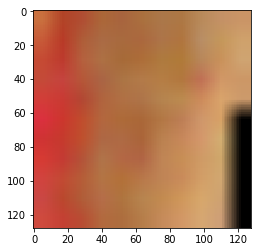

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(features[1014])

In [10]:
np.save("final_slum_features_sentinel_4_1826",features)    # save the created dataset
np.save("final_slum_labels_sentinel_4_1826", labels)

In [24]:
####for creation of prediction set from sequentially clipped satellite images.
 
parent_dir = "/media/deepank/086C617F6C616880/extra_space/vhr_clip_177x177/vhr_4/"
def extract_features():
    labels = []
    imgs = []
    count = 0
## the labels correspond to the unique tile number which is saved along with the tile itself.
    for each in sorted(glob.glob(parent_dir+ "*tif")):

        name = each.split("/")[-1]
        name = name.split(".")[0]
        labels.append(name)
        img = io.imread(each,plugin="tifffile")
        img = np.asarray(img)
        imgs.append(img)
        count+=1
        
    print(type(imgs))
    print(len(imgs))
    features_1 = np.asarray(imgs)
    print(features_1.shape)
    features = features_1.reshape(len(imgs),177,177,3)
    print(features.shape)
    return np.asarray(features), labels

In [25]:
features,labels = extract_features()

<class 'list'>
89198
(89198, 177, 177, 3)
(89198, 177, 177, 3)


In [27]:
np.save("/media/deepank/086C617F6C616880/extra_space/vhr_clip_177x177/mum4_map_prep_pleiades",features) ###saving the prediction sets.
np.save("/media/deepank/086C617F6C616880/extra_space/vhr_clip_177x177/mum4_map_prep_pleiades_lb",labels)